version 2.1 Morgan McKnight

# Blackjack OOP

We will begin by defining the classes that will be used in order to separate out different aspects of the game of blackjack. We will model three of the components of the game:

**Card:** A basic playing card. The card belongs to a suit (hearts ♥, diamonds ♦, spades ♠, or clubs ♣) and is worth a certain value.<br>
**Deck:** A collection of cards. The deck shrinks as cards are drawn and contains 52 unique cards.<br>
**Hand:** Each player's assigned cards. A hand is what defines each player's score and thus who wins.

'''
Completed Blackjack program. Source Next Tech sandbox can be found at https://next.tech/projects/94217701d98d/share.
'''

**Put your money down folks.** <br>
<div>
<img src="images/blackjack.jpeg" alt="Functions" width="500" align="center"/></div>




## REMEMBER! 

### We use magic methods to print instances or  objects directly.

In [ ]:
#Example 

class People:
        def __init__(self, first, last):
            self.first = first
            self.last = last
   # format it as if you were creating the object

    
        def __str__(self):
            return '{} - {}'.format(self.first,self.last)
    


In [ ]:
p1 = People('Morgan', 'Mcknight')

In [ ]:
print(p1)

### List Comprehensions


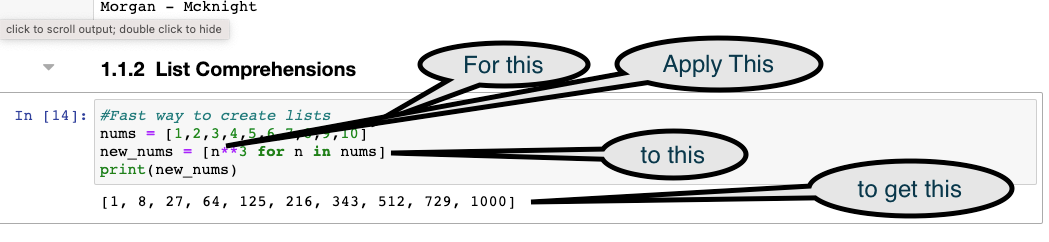







In [ ]:
#Fast way to create lists
nums = [1,2,3,4,5,6,7,8,9,10]
new_nums = [str(num) +" value" for num in nums for num in nums]
print(new_nums)

### SAQ 1 :  Make My Name
Given two lists first_names and last_names, using a List Comprehension  create a third list with every combination of first and last name.



In [ ]:
# Add your answer here
first_names =['Morgan','Tadgh','Tiarnan','Traolach','Fionn','Oisin','Grainne']
last_names =['McKnight','NiShe','Smith','Murphy','Jones']

full_names = [first +" "+ last for  first in first_names for last in last_names]

print(full_names)

## Step 1: Create the Card Class

In [1]:


class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value
# Print out in this format when printing card object
    def __repr__(self):
        return " of ".join((self.value, self.suit))
    def __str__(self):
        return " of ".join((self.value, self.suit))

In [2]:
my_card = Card('diamonds', '2')

In [3]:
print(my_card)

2 of diamonds


## Step 2: Create the Deck Class

We achieve this by using a list comprehension containing lists of every suit and value. We pass each combination over to the initialization for our Card class to create 52 unique Card instances. The Deck will need to be able to be shuffled so that every game is different. We use the shuffle function in the random library to do this for us . To avoid any potential errors, we will only shuffle a deck which still has two or more cards in it, since shuffling one or zero cards is pointless.

In [4]:
import random # for shuffling
class Deck:
    # First create a list comprehension containing lists of every suit and value
    def __init__(self):
        self.cards = [Card(suit, value) for suit in ["Spades", "Clubs", "Hearts",
                      "Diamonds"] for value in ["A", "2", "3", "4", "5", "6", 
                      "7", "8", "9", "10", "J", "Q", "K"]]

    def shuffle(self):
        # Check if deck has more than one card
        if len(self.cards) > 1:
            random.shuffle(self.cards)

    def deal(self):
        if len(self.cards) > 0:
            return self.cards.pop(0)  

In [ ]:
deck0 = Deck()
deck0.shuffle()



card1 = deck0.deal()
print(card1)
card2 = deck0.deal()
print(card2)



In [ ]:
deck1 = Deck()
deck1.shuffle()
my_card = deck1.deal()
# print card instant using the card Class __str__.
print(my_card)

### SAQ2: The devil is in the face.
Change the above Deck Class to produce card symbols.




In [ ]:
# Define the faces
spade_face= "\u2660"
heart_face= "\x1b[31m\u2665\x1b[0m"
diamond_face= "\x1b[31m\u2666\x1b[0m"
club_face= "\u2663"
print(heart_face)

In [ ]:
# Add your answer here

In [ ]:
import random # for shuffling
class Deck2:
    # First create a list comprehension containing lists of every suit and value
    def __init__(self):
        self.cards = [Card(s, v) for s in [spade_face, heart_face, diamond_face,
                      club_face] for v in ["A", "2", "3", "4", "5", "6", 
                      "7", "8", "9", "10", "J", "Q", "K"]]

    def shuffle(self):
        # Check if deck has more than one card
        if len(self.cards) > 1:
            random.shuffle(self.cards)

    def deal(self):
        if len(self.cards) > 1:
            return self.cards.pop(0)

In [ ]:
deck2 = Deck2()
deck2.shuffle()
my_card = deck2.deal()
print(my_card)

## Step 3: Create the Hand Class
A Hand class will need to contain cards just like the Deck class does. It will also be assigned a value by the rules of the game based on which cards it contains. Since the dealer's hand should only display one card, we also keep track of whether the Hand belongs to the dealer to accommodate this rule.
-- If the card's value is numerical, we add its value to the value of this hand (self.value).
-- If it is not numerical, we check to see whether the card is an ace. If it is, we add 11 to the hand's value and set the has_ace flag to True.
-- If it is not an ace, we simply add 10 to the value of the hand.

In [5]:
class Hand:
    def __init__(self, dealer=False):
        self.dealer = dealer # check if this is dealer hand or player (dealer = 'True' means it is dealer)
        self.cards = []
        self.value = 0

    def add_card(self, card): # When we call this method we append (add) a card to the hand
        self.cards.append(card)

    def calculate_value(self): # We need to calculate the value of each hand
        self.value = 0
        has_ace = False
        for card in self.cards: # check all cards in hand 
            if card.value.isnumeric(): #case 1
                self.value += int(card.value)
            else:               # non numeric  
                if card.value == "A": #case 2
                    has_ace = True
                    self.value += 11
                else:
                    self.value += 10 #Case 3
                    
        # Check to see of the Ace brings the hand value above 21 if it does then set to 1 (-10)
        if has_ace and self.value > 21: 
            self.value -= 10

    def get_value(self):
        self.calculate_value()
        return self.value

    def display(self):
        if self.dealer: # If dealer value = True
            print("hidden") # Hide first card
            print(self.cards[1]) #Show second card
        else: #player
            for card in self.cards:
                print(card)
            print("Value:", self.get_value()) #Get value of two cards


In [ ]:
# Create a deck
my_deck = Deck()
my_deck.shuffle()
# create Hands
#Player Hand
my_hand = Hand()

#Dealer Hand
dealer_hand = Hand(dealer = True)



In [ ]:
#Now we add a card to the hand using the add_card() method. Using as a  parameter the my_deck.deal() method.
# deal a card from new deck
card_1 = my_deck.deal()
#print(card_1)
my_hand.add_card(card_1)# first Card
my_hand.add_card(my_deck.deal())# Second Card
print("Player Hand\n")
print(my_hand.display())

print("\n")
print("Dealer Hand\n")
dealer_hand.add_card(my_deck.deal())
dealer_hand.add_card(my_deck.deal())
print(dealer_hand.display())

# Call the display method, which also calculates the hand value
#print(my_hand.display())
#print(dealer_hand.display())

## Step 4: Create the Game Class
We will define the game's main loop within its play method, so that to start a game, you will simply need to create an instance of the Game class and call .play() method:

In [6]:
# The game itself is only a loop. No initilasation.
class Game:
    def __init__(self):
        pass

    def play(self):
        playing = True # This will be changed to false when we want to stop
        
        # while the playing boolean value is set to True (keep playing)
        while playing:
            self.deck = Deck() # Create a deck
            self.deck.shuffle() # call the shuffle method

            self.player_hand = Hand()   # Create an empty  hand for the player-empty
            self.dealer_hand = Hand(dealer=True) # Create an empty hand for the dealer

            for i in range(2): #deal two cards to each hand
                self.player_hand.add_card(self.deck.deal())
                self.dealer_hand.add_card(self.deck.deal())

            print("Your hand is:")
            self.player_hand.display()
            print()
            print("Dealer's hand is:")
            self.dealer_hand.display() #First card is hidden

            #Set this variable individual game not over noone is bust.
            game_over = False

            while not game_over:   # while game_over == false
                
                # checking both hands for Blackjack
                player_has_blackjack, dealer_has_blackjack = self.check_for_blackjack()# checking both together
                
                if player_has_blackjack or dealer_has_blackjack: #if either/both is True
                    game_over = True
                    self.show_blackjack_results(player_has_blackjack, dealer_has_blackjack)
                    continue

                choice = input("Please choose [Hit / Stick] ").lower()
                while choice not in ["h", "s", "hit", "stick"]: #Checks for all instances
                    choice = input("Please enter 'hit' or 'stick' (or H/S) ").lower()
                    
                if choice in ['hit', 'h']: # Deal another card
                    self.player_hand.add_card(self.deck.deal())
                    self.player_hand.display()
                    if self.player_is_over():
                        print("You have lost!")
                        game_over = True
                        
                else: # Player still in game
                    player_hand_value = self.player_hand.get_value()
                    dealer_hand_value = self.dealer_hand.get_value()

                    print("Final Results")
                    print("Your hand:", player_hand_value)
                    print("Dealer's hand:", dealer_hand_value)

                    if player_hand_value > dealer_hand_value:
                        print("You Win!")
                    elif player_hand_value == dealer_hand_value:
                        print("Tie!")
                    else:
                        print("Dealer Wins!")
                    game_over = True
            
            again = input("Play Again? [Y/N] ")
            while again.lower() not in ["y", "n"]:
                again = input("Please enter Y or N ")
            if again.lower() == "n":
                print("Thanks for playing!")
                playing = False
            else:
                game_over = False

    def player_is_over(self):
        return self.player_hand.get_value() > 21

    def check_for_blackjack(self):
        player = False
        dealer = False
        if self.player_hand.get_value() == 21:
            player = True
        if self.dealer_hand.get_value() == 21:
            dealer = True

        return player, dealer

    def show_blackjack_results(self, player_has_blackjack, dealer_has_blackjack):
        if player_has_blackjack and dealer_has_blackjack:
            print("Both players have blackjack! Draw!")

        elif player_has_blackjack:
            print("You have blackjack! You win!")

        elif dealer_has_blackjack:
            print("Dealer has blackjack! Dealer wins!")

## Step 5 Play a Game

In [9]:
# if __name__ == "__main__":
game = Game()
game.play()

Your hand is:
2 of Diamonds
8 of Clubs
Value: 10

Dealer's hand is:
hidden
4 of Hearts
Please choose [Hit / Stick] h
2 of Diamonds
8 of Clubs
K of Hearts
Value: 20
Please choose [Hit / Stick] s
Final Results
Your hand: 20
Dealer's hand: 14
You Win!
Play Again? [Y/N] n
Thanks for playing!


##  SAQ 3 : Open your own Casino¶
Expand the Game so that up to five players can play. Use faces instead of Suit names. See if you can add a cheat that we cannot spot.

**Phew!** <div>
<img src="images/the_end.png" alt="The End" width="300" align="center"/></div>